In [1]:
import pandas as pd

In [2]:
census_data = pd.read_csv('census_income_data.csv')

In [3]:
census_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,39.0,7.0,77516.0,9.0,13.0,4.0,1.0,1.0,4.0,1.0,2174.0,0.0,40.0,39.0,0.0
1,50.0,6.0,83311.0,9.0,13.0,2.0,4.0,0.0,4.0,1.0,0.0,0.0,13.0,39.0,0.0
2,38.0,4.0,215646.0,11.0,9.0,0.0,6.0,1.0,4.0,1.0,0.0,0.0,40.0,39.0,0.0
3,53.0,4.0,234721.0,1.0,7.0,2.0,6.0,0.0,2.0,1.0,0.0,0.0,40.0,39.0,0.0
4,28.0,4.0,338409.0,9.0,13.0,2.0,10.0,5.0,2.0,0.0,0.0,0.0,40.0,5.0,0.0


In [4]:
census_data.income_level.value_counts()

0.0    37155
1.0    11687
Name: income_level, dtype: int64

In [5]:
census_data['sex'] = census_data['sex'].astype(str)

str_columns = ['sex', 'workclass', 'education', 'marital_status',
              'occupation', 'relationship', 'race', 'native_country', 
               'income_level']

for column in str_columns:
    census_data[column] = census_data[column].astype(str)

In [6]:
census_data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
census_data.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
education_num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital_gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital_loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours_per_week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


In [8]:
corr = census_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1,-0.0766281,0.0309404,0.077229,0.0569438,0.0715583
fnlwgt,-0.0766281,1,-0.0387607,-0.00370639,-0.00436615,-0.0135187
education_num,0.0309404,-0.0387607,1,0.125146,0.0809719,0.143689
capital_gain,0.077229,-0.00370639,0.125146,1,-0.0314408,0.0821573
capital_loss,0.0569438,-0.00436615,0.0809719,-0.0314408,1,0.0544672
hours_per_week,0.0715583,-0.0135187,0.143689,0.0821573,0.0544672,1


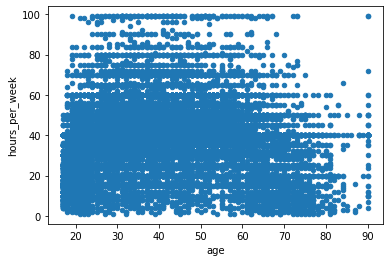

In [9]:
census_data.plot(x = 'age', y = 'hours_per_week', kind = 'scatter')

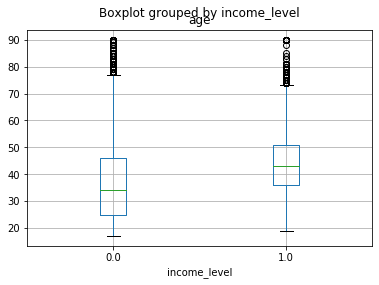

In [10]:
census_data.boxplot(column = 'age', by = 'income_level')

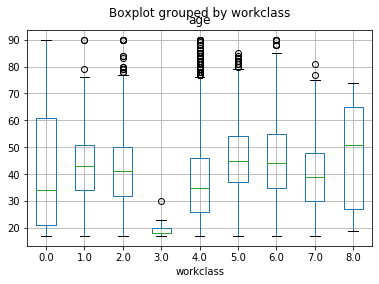

In [11]:
census_data.boxplot(column = 'age', by = 'workclass')

In [12]:
oh_census = pd.get_dummies(census_data, drop_first = True)

In [13]:
oh_census.shape

(48842, 101)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
y = oh_census['income_level_1.0']
X = oh_census.drop('income_level_1.0', axis = 1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr_clf = LogisticRegression()

In [19]:
lr_clf.fit(X_train, y_train)

/home/kropotkin/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
lr_clf.score(X_train, y_train)

0.7974939259097485

In [21]:
lr_clf.score(X_test, y_test)

0.8012447792973548

In [22]:
lr_clf.coef_

array([[-5.42434511e-03, -3.55744439e-06, -2.38874576e-03,
         3.36312752e-04,  7.71402812e-04, -1.00836879e-02,
         1.47407725e-04,  1.01327736e-04, -1.56775166e-06,
        -1.78069039e-03,  3.61463189e-04, -2.20808733e-05,
        -2.79031122e-05, -4.82936623e-06, -4.00168819e-04,
         2.17524337e-04, -1.63284057e-03,  6.21847436e-04,
        -1.81208060e-05,  2.73131351e-04, -8.28935538e-04,
        -1.21303662e-04, -4.18400538e-05, -9.03794612e-05,
        -1.85768441e-04, -1.33623678e-04, -8.81653328e-06,
        -6.63765820e-05,  9.43303729e-04,  2.15204902e-06,
         3.60638696e-03, -1.00719936e-04, -3.56470645e-03,
        -2.86371213e-04, -2.81256453e-04, -6.75724309e-04,
         8.98793324e-04,  5.80747542e-05, -6.17100094e-05,
         2.09888841e-05, -1.19448299e-04,  1.74388224e-06,
        -2.54239691e-04,  1.04202369e-03, -2.15856626e-04,
        -3.75344595e-04, -4.04925295e-04, -1.08390428e-03,
        -5.57765125e-05, -2.11654814e-03, -3.21065573e-0

In [23]:
from sklearn.svm import SVC

In [24]:
svm_clf = SVC()

In [25]:
#svm_clf.fit(X_train, y_train)


In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn_clf = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1)

In [32]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [33]:
knn_clf.score(X_train, y_train)

0.836258906390762

In [34]:
knn_clf.score(X_test, y_test)

0.7785603144705593

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
params_dict = {'leaf_size': [5, 15, 20, 30],
              'n_neighbors': [10, 25, 50, 100]}

In [41]:
knn_clf = KNeighborsClassifier()

In [42]:
grid_search = GridSearchCV(knn_clf, params_dict, cv = 2)

In [43]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'leaf_size': [5, 15, 20, 30],
                         'n_neighbors': [10, 25, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [44]:
grid_search.best_score_

0.7971117359613442

In [45]:
grid_search.best_params_

{'leaf_size': 5, 'n_neighbors': 25}

In [ ]:
grid_search.